In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
metadata = pd.read_json('genome/metadata_updated.jsonl', lines=True)

In [3]:
metadata.head()

,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5


In [4]:
metadata.nunique()

title         84484
directedBy    33750
starring      76534
avgRating     14526
imdbId        84661
item_id       84661
dtype: int64

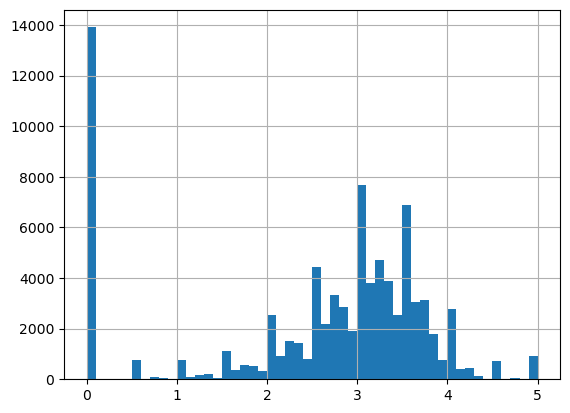

In [5]:
metadata['avgRating'].hist(bins=50)
plt.show()

In [6]:
dataframes = []
chunksize = 10000
chunk_number = 1

with open('genome/ratings.jsonl', 'r', encoding='utf-8') as file:
    chunk = []
    for i, line in enumerate(file):
        chunk.append(json.loads(line.strip()))  
        if (i + 1) % chunksize == 0:
            df_chunk = pd.DataFrame(chunk)
            dataframes.append(df_chunk)
            chunk = []
            print(f'Chunk {chunk_number} loaded')
            chunk_number += 1
    
    if chunk:
        df_chunk = pd.DataFrame(chunk)
        dataframes.append(df_chunk)

df = pd.concat(dataframes, ignore_index=True)

df.head()

Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
Chunk 15 loaded
Chunk 16 loaded
Chunk 17 loaded
Chunk 18 loaded
Chunk 19 loaded
Chunk 20 loaded
Chunk 21 loaded
Chunk 22 loaded
Chunk 23 loaded
Chunk 24 loaded
Chunk 25 loaded
Chunk 26 loaded
Chunk 27 loaded
Chunk 28 loaded
Chunk 29 loaded
Chunk 30 loaded
Chunk 31 loaded
Chunk 32 loaded
Chunk 33 loaded
Chunk 34 loaded
Chunk 35 loaded
Chunk 36 loaded
Chunk 37 loaded
Chunk 38 loaded
Chunk 39 loaded
Chunk 40 loaded
Chunk 41 loaded
Chunk 42 loaded
Chunk 43 loaded
Chunk 44 loaded
Chunk 45 loaded
Chunk 46 loaded
Chunk 47 loaded
Chunk 48 loaded
Chunk 49 loaded
Chunk 50 loaded
Chunk 51 loaded
Chunk 52 loaded
Chunk 53 loaded
Chunk 54 loaded
Chunk 55 loaded
Chunk 56 loaded
Chunk 57 loaded
Chunk 58 loaded
Chunk 59 loaded
Chunk 60 loaded
Chunk 61 loaded
Chunk 62 loaded
Chunk 63 loaded
C

,item_id,user_id,rating
0,5,997206,3.0
1,10,997206,4.0
2,13,997206,4.0
3,17,997206,5.0
4,21,997206,4.0


In [7]:
df['item_id'].unique().size

67873

In [8]:
with open('genome/reviews.jsonl', 'r', encoding='utf-8') as file:
    chunk = []
    for line in file:
        chunk.append(line)
        if len(chunk) >= chunksize:
            reviews_1000 = process_chunk(chunk)
            chunk = []
            break

NameError: name 'process_chunk' is not defined

In [ ]:
reviews_1000.iloc[0]['txt']

'one-shot record of a belly dancer; "Carmencita Dancing," one of a series of Edison short films featuring \r circus and vaudeville acts, displayed the... um... "talents" of a zaftig belly-dancer who agreed to undulate before the camera of the famous "Black \r Maria" studio. \r \r The dance was originally intended to be played in a Kinetoscope, a single -person arcade viewer connected to Edison\'s more famous invention, the phonograph. Through a pair of crude headphones, the latter device supplied an asynchronous soundtrack of "hootchie-cootchie" music. \r \r The Kinetograph camera here employed is so new -- even to its inventors \r -- that director Dickson has drastically "overcranked" the film, unintentionally producing one of the first examples of slow-motion.\r \r Carmencita\'s titillating movements were considered by many to be \r scandalous. Thus, the film prompted some of the earliest discussions of film censorship.'

In [ ]:
tag_count = pd.read_json('genome/tag_count.jsonl', lines=True)
tag_count.head()

,item_id,tag_id,num
0,1,86963,4
1,1,42940,1
2,1,37116,26
3,1,52206,1
4,1,34442,21


In [ ]:
distinct_movies = tag_count['item_id'].nunique()
distinct_movies

39685